In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt 
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [5]:
tweets = pd.read_csv('vfarms.csv')

In [6]:
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1260879852917440512,1260879852917440512,1589452157000,2020-05-14,06:29:17,EDT,1126761840678178816,sixteenthvenus,Ø,NaN,“i only have ugly pennies”\n“show me your ant ...,[],[],[],0,0,0,[],[],https://twitter.com/sixteenthvenus/status/1260...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1126761840678178816', 'username'...",NaN,NaN,NaN,NaN
1,1260878483799961602,1260692294870732800,1589451831000,2020-05-14,06:23:51,EDT,875727134089785351,toddcitron,Todd Alan Citron,NaN,No indoor plumbing yet? Sounds like my Momma’...,['shaniatwain'],[],[],0,0,0,[],[],https://twitter.com/ToddCitron/status/12608784...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '875727134089785351', 'username':...",NaN,NaN,NaN,NaN
2,1260868773202071554,1260839178432020480,1589449515000,2020-05-14,05:45:15,EDT,2561944748,defectinggrey,AmbrosiaCreamChapel,NaN,"“But...”, someone shouts. “... indoor farms!” ...",['botanygeek'],[],[],0,0,0,[],[],https://twitter.com/DefectingGrey/status/12608...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2561944748', 'username': 'Defect...",NaN,NaN,NaN,NaN
3,1260829270907158529,1260829270907158529,1589440097000,2020-05-14,03:08:17,EDT,821748775127552001,ganja_seeds,#Cannabis seeds worldwide,NaN,Learn how to grow weed >> http://www.howtogro...,[],"['http://www.howtogrowweed420.com/3103.html', ...",[],0,0,0,[],[],https://twitter.com/ganja_seeds/status/1260829...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '821748775127552001', 'username':...",NaN,NaN,NaN,NaN
4,1260805936748408833,1255254212243525635,1589434534000,2020-05-14,01:35:34,EDT,1027244220128608256,morty_lin,M Æ R-3,NaN,For me it's partly due to having more time to ...,['magdalenakala'],[],[],0,0,0,[],[],https://twitter.com/morty_lin/status/126080593...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1027244220128608256', 'username'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,1132449739071401984,1132449739071401984,1558832032000,2019-05-25,20:53:52,EDT,892476305416962048,nodak541,NoDak Green Prairie,NaN,**Lemon Kush** Indoor grown by Fern Ridge Farm...,[],[],[],0,0,0,[],[],https://twitter.com/nodak541/status/1132449739...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '892476305416962048', 'username':...",NaN,NaN,NaN,NaN
7179,1132416383151616000,1132416383151616000,1558824079000,2019-05-25,18:41:19,EDT,34152439,honnonji,ꦲꦱ꧀ꦭꦶꦥꦤꦫꦒ,NaN,How this indoor hydroponic farm is improving f...,[],[],[],0,0,0,[],[],https://twitter.com/Honnonji/status/1132416383...,False,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '34152439', 'username': 'Honnonji'}]",NaN,NaN,NaN,NaN
7180,1132367187614814209,1132367187614814209,1558812350000,2019-05-25,15:25:50,EDT,465212150,art_ticulate,Sarah,NaN,My work friend invited me to her family's farm...,[],[],[],1,0,2,[],[],https://twitter.com/art_ticulate/status/113236...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '465212150', 'username': 'art_tic...",NaN,NaN,NaN,NaN
7181,1132349963529146368,1132346515022860292,1558808244000,2019-05-25,14:17:24,EDT,1001914360774647808,tomthetrader1,tom 🧙‍♂️,NaN,Michael- hard question because I’m uncertain h...,['46rienzo'],[],[],1,0,0,[],[],https://twitter.com/tomthetrader1/status/11323...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1001914360774647808', 'username'...",NaN,NaN,NaN,NaN


In [7]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [8]:
tweets.set_index('date', inplace=True)

In [9]:
just_tweets = tweets[['tweet']]

In [10]:
just_tweets

,tweet
date,
2020-05-14,“i only have ugly pennies”\n“show me your ant ...
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...
2020-05-14,"“But...”, someone shouts. “... indoor farms!” ..."
2020-05-14,Learn how to grow weed >> http://www.howtogro...
2020-05-14,For me it's partly due to having more time to ...
...,...
2019-05-25,**Lemon Kush** Indoor grown by Fern Ridge Farm...
2019-05-25,How this indoor hydroponic farm is improving f...
2019-05-25,My work friend invited me to her family's farm...


In [11]:
analyzer = SentimentIntensityAnalyzer()
for tweet in just_tweets['tweet']:
    vs = analyzer.polarity_scores(tweet)
    print("{:-<65} {}".format(tweet, str(vs)))

“i only have ugly pennies”
“show me your ant farm!”
“i’m losing my indoor mind” {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.7345}
No indoor plumbing yet?  Sounds like my Momma’s farm. Cute picture Shania!  Blessings to You, Frédéric and Eja. God Bless You from Carlsbad Beach (San Diego), CA. {'neg': 0.059, 'neu': 0.562, 'pos': 0.38, 'compound': 0.8999}
“But...”, someone shouts. “... indoor farms!” [Shows cute photo of trays of cress/garnish] {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.5093}
Learn how to grow weed >>  http://www.howtogrowweed420.com/3103.html  || Super High: Roseville Electric leads police to indoor Weed Farm - Rocklin & Roseville Today  https://www.rosevilletoday.com/news/roseville/indoor-marijuana-farm-bust/ … {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.5994}
For me it's partly due to having more time to research stuff to buy/browse / Feels more productive than watching Netflix / time for discovering new things E.g. I never thought I'd 

 https://buff.ly/359XBdq  pic.twitter.com/bqX3fqVpgW {'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.5849}
Betta grow two fruit tree. Indoor farm--------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Bowling, playcentres, pet farms, indoor activities - when will the help come @HHumphreysFG ? https://twitter.com/PALI_IRE/status/1254348732059058178 … {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}
Good morning. So, you’re starting a farm at home ... look at this 😄 : 12 Indoor Gardening Hacks That Make You Throw Your Hands up and Sprout!  https://youtu.be/fiLnT9IzVx0  via @YouTube {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.8429}
With our patented grow lights in our vertical indoor farm, we have been able to sow and harvest numerous greens and micro greens. Here is the curled parsley in heavenly bloom. It has numerous benefits from being rich in antioxidants to cancer fighting substances etc. 
#veggitech pic.twitter.com/N7boPRMxyU

✅This Canadian site FarmFood 360 offers 11 Virtual Tours of farms from minks, pigs, and cows, to apples and eggs.  https://www.farmfood360.ca/ 
✅Indoor Activities for busy toddlers
 https://busytoddler.com/2020/03/indoor-activities/?fbclid=Iw …...

✅Play games and learn all about animals
 https://switchzoo.com/  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
CONTAINER FARMS: Indoor Vertical Farmer Grows Local Lettuce For Hospitals in Florida During COVID-19   https://www.igrow.news/igrownews/indoor-vertical-farmer-grows-local-lettuce-for-hospitals-in-florida-during-covid-19 …  iGrow News {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This is one thing my future indoor farm WILL not do.. And would rather ensure that low income families have food on their table. then to waste food. {'neg': 0.151, 'neu': 0.769, 'pos': 0.08, 'compound': -0.3182}
Don’t worry Democrat’s on the UV light stuff,, we have not made lightbulb in the USAsince 2012 , I don’t know though , them indoor h

ACREAGE FOR SALE... INDOOR POOL!
 https://www.farmmarketer.com/listing/skfarm/SK799483 …
Farm Type: Acreage
Acreage (Total): 11.34
Province: Manitoba
Agent: Carla McLean

#Findyourdreamproperty #farmmarketer #farmrealestate #farmrealtor #cdnfarmers #farmlife #farmlifeisthebest #farm365 #forsale pic.twitter.com/6zr7VxkXt9 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I WISH! but i have 2 dogs, 2 cats, and 1 indoor rabbit, 2 outdoor rabbits and a farm husband stuck here in the city.

my animals are all gross and rude.

i'd need sturdy slippers in my house {'neg': 0.227, 'neu': 0.727, 'pos': 0.046, 'compound': -0.8666}
UAE farms see boom not gloom in coronavirus lockdowns #indoor #agritech https://finance.yahoo.com/news/uae-farms-see-boom-not-124155508.html … {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.4449}
I hope everyone pays attention and plans a garden or indoor microgreen farm. Sadly, most will do nothing, then whine when there is no food. {'neg': 0.161, 'neu': 0.

Abu Dhabi Invests $100 Million In a Plant-Based Indoor Farm  https://www.livekindly.co/abu-dhabi-invests-100-million-in-a-plant-based-indoor-farm/ … via @livekindlyco {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Are your kids dreaming of summer? Check out summer camps with our Camp Guide sponsor, @Keystone_Adv!
Keystone's gorgeous 15-acre campus offers a pond, creek, farm animals, and cozy indoor spaces! 

Daily/weekly camp options available from end of May-mid-July for ages 4-5th grade.  pic.twitter.com/X7NvoxaCvG {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.6792}
Abu Dhabi Invests $100 Million In a Plant-Based Indoor Farm | LIVEKINDLY  https://www.livekindly.co/abu-dhabi-invests-100-million-in-a-plant-based-indoor-farm/ … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Hunter valley farms is a bit pricey but I think they had alot of variety for indoor vs outdoor. I've wanted to have a wedding there since I was engaged back in 2012 lol {'neg': 0.0, 'neu': 0.81

But it also makes us feel very good with a false sense of superiority and status. We all need to do much better than IG Farben Neoliberal Factory farms. I have hope for indoor vertical farming and urban greenhouses. {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'compound': 0.9441}
1. She HAS to be super hot.
2. She has to be really good at the sex.
3. She has to have a really great personality
Conclusion: Watch the electricity bill to make sure y’all don’t get caught by her indoor pot farm (if that’s what’s happening) and just let her have the 2nd floor. {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.9298}
I board my horse at Noble Spirit Farm! Not sure what you’re looking for. There’s an indoor and outdoor arena. I really only trail ride and there’s plenty of that. {'neg': 0.058, 'neu': 0.795, 'pos': 0.147, 'compound': 0.4642}
Check this out! A group of New York City teens harvested enough fresh produce from an indoor hydroponic farm to feed 2,000+ school lunch. #FeelGoodFriday #Fr

❤️Chain of heart ❤️It’s an endless love. #chainofhearts #love #heart #plants #indoorplants #houseplants #indoor #succulents #garden #green #chain #nursery #farm @ T-ko Succulents  https://www.instagram.com/p/B-XnVbAJC-k/?igshid=1aobzgrw6ijpu … {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.8555}
We continue to be grateful for the way our friends at @FoodShuttle are serving the citizens of Wake County. While all indoor volunteer opportunities have been suspended, opportunities to work on their Dover Farm Road farm still exist w/ restrictions. See their Tweet to learn more  https://twitter.com/FoodShuttle/status/1243632565182967808 … {'neg': 0.054, 'neu': 0.749, 'pos': 0.197, 'compound': 0.802}
1) For everyone out there suffering toilet-paper anxiety, I am here to help bring relief.

I grew up on a subsistence farm in a county that yet remains one of the poorest in the nation. Hilly, poor, sparsely populated. In place of indoor plumbing, we had an outhouse.
#COVID19 {'neg': 0.189

Ugh. Thank goodness! I used to have that drive and it was awful. Now we have an indoor on the family farm which is pretty much heaven, not going to lie. {'neg': 0.135, 'neu': 0.58, 'pos': 0.285, 'compound': 0.7574}
Detroit indoor vertical farm boosts local food, jobs & community  https://youtu.be/VDbq7TN4Yrg  via @YouTube {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
Why do you need government hand outs to turn your business into an indoor farm? Do you think the thousands of farmers and market businesses received the same? {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.5514}
Decentralized food ... coming to your area .. You can also do this at home on small scale .. hydroponics .. Aquaponics..
Detroit indoor vertical farm boosts local food, jobs & community #food #indoorgardening #winter #grow #gardening https://www.youtube.com/watch?v=VDbq7TN4Yrg … {'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.3182}
It Will Be A Green Industry For Yucatan Whose Process 

Nice comfortable home with a pool, indoor gym, a study, a little farm for fresh produce, a store stocked up with food and provisions for a month.  Cash doillar in the bank so no fear of finances. Praying and trusting in God for our safety and for it all to come to an end.  https://twitter.com/_Oroboghene/status/1241314602387988480 … {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9613}
“As a #food producing company, we believe we have a greater societal obligation to feed people, particularly during these times of need when we see empty food shelves” Read more via our @Medium article:  
 https://medium.com/@AeroFarms/a-message-of-commitment-and-gratitude-from-aerofarms-ceo-safety-and-policies-around-covid-19-51ba3792ad26 … #farming #agriculture #indoorfarm #verticalfarm {'neg': 0.043, 'neu': 0.898, 'pos': 0.059, 'compound': 0.1779}
It’s a weird tweet, but it’s what I heard from my grandparents about growing up on the farm before indoor plumbing.  The corn cobs came from field co

Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Can't wait to try it thanks to @socialnature to try and review! #trynatural https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&user_referrer=433435&user_referral_channel=twitter&product=666 … {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.5399}
 https://psmag.com/social-justice/the-farms-of-the-future-were-built-for-outer-space-will-they-work-on-earth … 

It takes a lot of land to generate that much solar—about five acres of solar panels to supply the light for just one acre of indoor farm, Dr. Bugbee  USU {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Elon Musk's brother plans to open 'Super Farm' 

 https://freshfruitportal.com/news/2020/03/07/elon-musks-brother-plans-to-open-super-farm/ …… 

The waistful strategy of reproducing light for indoor farms is leftover concept from the Obama Unicorn era. 

Takes 5 acres of solar panels to provide for one acre indoor

Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&product=666 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-broccoli?social=twitter&user_referrer=277874&user_referral_channel=twitter&product=665 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
Indoor Farm – Virily  https://www.bloglovin.com/blogs/jedi-mind-trick-19150137/indoor-farm-virily-7340596047 … on @bloglovin {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #tryna

Crown Court was a staple for those of us pretending to be sick from school a great programme. Plus Emmerdale Farm was always a lunchtime programme. The best however was Indoor League pure class best theme music ever {'neg': 0.066, 'neu': 0.657, 'pos': 0.277, 'compound': 0.891}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&user_referrer=205479&user_referral_channel=twitter&product=666 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
The owners of Trevalgan Holiday Farm have thought of everything to make your family holiday run smoothly! You'll find indoor & outdoor play areas, a pets corner & games room to keep kids of all ages entertained.

Self Catering 🏡
 http://www.aroundaboutbritain.co.uk/Cornwall/1059 
#HolidayCottages #StIves pic.twitter.com/GbCdQlLyCm {'neg': 0.0, 'neu': 0.796, 'po

- No less than 12 shopping carts. {'neg': 0.114, 'neu': 0.832, 'pos': 0.053, 'compound': -0.3947}
This indoor hydroponic farm in New Jersey grows food 365 days a year  pic.twitter.com/KcThP6CYBp {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Are indoor vertical farms the future of agriculture?
 https://iorma.com/are-indoor-vertical-farms-the-future-of-agriculture/ … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&user_referrer=39770&user_referral_channel=twitter&product=666 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/mushroom-grow-kit?socia

We design indoor arenas to be as distinctive as the farms where they are located. This example, Circle B Ranch in Arlington, Washington, is 100’ x 200.' It has a “crow’s nest” observation area and is used for hunter/jumper and show training as well as recreation.  pic.twitter.com/TNJp0Du26P {'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.2732}
Indoor weed farm------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Breathe in some fresh #farm air and enjoy all our #play areas!🥰
Our outdoor and indoor play areas are the perfect pit stop between meeting and feeding our adorable #animals🐍🐰
50% off entry until 7th Feb!✨
 https://www.barleylands.co.uk/farm-park/tickets/ … #barleylands #outdoorplay pic.twitter.com/ffrAkZSQRJ {'neg': 0.033, 'neu': 0.619, 'pos': 0.348, 'compound': 0.9632}
The pic is about a year old. “Bolt” is no longer with us. He was the coolest cat! Bolt was an indoor/outdoor farm cat. He kept himself so clean. The vet a

A high-tech salad and green drink from the subway station. Very cool. Metro Farm with farm8_ have taken subway space and turned it into large indoor, hydroponic farms using specialized lights to grow lettuce,…  https://www.instagram.com/p/B8A8OOIHXxV/?igshid=18za2ra0644t9 … {'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.3804}
There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1796}
Urban indoor farms are the New Farms Globally replacing Land based Agri farming practices..

Urban Indoor Farms can grow Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for too Much Water & Soil & Without Worrying About Droughts & Floods.. {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.2584}
There ar

Urban Indoor Farms can grow Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for too Much Water & Soil & Without Worrying About Droughts & Floods.. {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.2584}
@SchneiderElec is proud to partner Fifth Season, powered by RoBotany & Scale Microgrid on this sustainably designed indoor vertical farm. It will use 0 pesticides & 95% less water while utilizing renewables to grow food locally.  https://lnkd.in/eisJvHQ  {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.4767}
There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1796}
Urban indoor farms are the New Farms Globally replacing Land based Agri farming practices..

Urban Indoor Farms can grow 

There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1796}
Urban indoor farms are the New Farms Globally replacing Land based Agri farming practices..

Urban Indoor Farms can grow Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for too Much Water & Soil & Without Worrying About Droughts & Floods.. {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.2584}
Our beautiful family homes at Millfield Farm, Burton Joyce merge indoor and outdoor living, featuring double patio doors allowing you to make the most of your garden space ☀️ →  https://buff.ly/2tIdUiF  pic.twitter.com/Jh7DstLzxo {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.5994}
they have been actively building doomsday bunkers wit

With my boyfriend having his own indoor pig farm, I CANNOT stress enough the consequences this programme could have on pig farmers.  Bio security is paramount with pig farmimg! I seriously hope people do not act on this program and target us!  https://twitter.com/ShaneMcAuliffe1/status/1217118377459712000 … {'neg': 0.034, 'neu': 0.801, 'pos': 0.165, 'compound': 0.7591}
The What's On My Plate? JanTerm class explored the @ponixfarms/@farmboxfoods hydroponic farming system housed in a shipping container! The sustainable indoor farm gives people direct access to fresh fruits, vegetables, and herbs. #janterm20 pic.twitter.com/6rTJsNSIad {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.3802}
World's first commercial-scale tomato indoor farm using only LED lights to grow fresh tomatoes will begin operation in Abu Dhabi later this year 
 https://www.arabianbusiness.com/technology/437624-how-tomato-revolution-is-taking-place-in-abu-dhabi … {'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compoun

for example: @CornellCALS  has been researching whether or not indoor farms are actually profitable. No VC has ever proven this... nor has anyone in the history of agriculture 😉  pic.twitter.com/i94Ozp41J0 {'neg': 0.042, 'neu': 0.814, 'pos': 0.144, 'compound': 0.6597}
All year long, no matter the weather! Don’t worry- many of our HD farms have indoor riding arenas, so the fun never has to stop! Book a lesson today on  http://HeelsDown.com 🐴💙
#heelsdownapp #heelsdown #bookridinglessonsonline #learntoride #horsebackriding #ridinglessons pic.twitter.com/SYTGatczSn {'neg': 0.083, 'neu': 0.791, 'pos': 0.126, 'compound': 0.4725}
We're exactly 2 WEEKS AWAY from #AgDays20 - Canada's largest indoor farm show and we can’t wait to show off the NEW AccuMix! 

 http://www.AgDays.com  pic.twitter.com/nvjnmAsDyz {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Someone I work with is selling a farm with a 2 br house, 6 stall barn, attached indoor, on 82 acres for $275,000 that’s such a steal some

Memory of my FIL: argued politics w/me til we drove family crazy, left GOP b/c Bush, then chaired Dem congressional campaign in most reactionary part of OR. He took care of everyone he ❤️d & I think of him growing up on MN farm w/8 sibs, w/o indoor plumbing, when I feel tested. {'neg': 0.082, 'neu': 0.836, 'pos': 0.082, 'compound': 0.0}
Atree Soil pH Meter, 3-in-1 Soil Tester Kits with Moisture,Light and PH Test for Garden, Farm, Lawn, Indoor & Outdoor (No Battery Needed)  https://welovetheearth.com/atree-soil-ph-meter-3-in-1-soil-tester-kits-with-moisturelight-and-ph-test-for-garden-farm-lawn-indoor-outdoor-no-battery-needed-6/ … pic.twitter.com/fvYU5ltKrp {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Lily Farm Fresh Event Center has both indoor and outdoor space! Climate controlled inside and stunning mountain views outside make it the perfect venue for any event! #coloradovenue #barninspiredvenue pic.twitter.com/1ROsgB7mHE {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound':

Root Farm All-Purpose LED Grow Light, 45W - Broad Spectrum Grow Lamp, For Indoor Hydroponic Plants, Energy Efficient

 https://amzn.to/36gHERW  pic.twitter.com/hLAMk32npJ {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.5994}
Fifth-generation farmer, Rob Morgan, shows us around his farm @gfchristmastree. Home to 500,000 Christmas trees, 36 reindeer and an Indoor Winter Wonderland, it’s a little slice of Lapland in glorious Gower 🎄
#ThisIsMyWales pic.twitter.com/SuPk33Quxn {'neg': 0.088, 'neu': 0.809, 'pos': 0.103, 'compound': 0.1531}
38% OFF
Costa Farms Live Indoor Christmas Tree, 4-Feet Tall, Ships with Red Planter and White Snowflakes, Fresh From Our Farm, Great as Holiday Gift or Christmas Decoration.

BUY NOW:  https://amzn.to/2smSmru 
#fridayFeelings #FridayThoughts pic.twitter.com/XHAEbW9X2J {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9001}
Root Farm All-Purpose LED Grow Light, 45W - Broad Spectrum Grow Lamp, For Indoor Hydroponic Plants, Energy Efficient

 https

"Pideka-Ikänik Farms, la única compañía dedicada al indoor en el país, certificó su logro en los laboratorios de la @Utadeo_edu_co  y @SomosAGROSAVIA y alcanzó los estándares europeos" @RevistaSemana pic.twitter.com/pql8MH63DI {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Using my grandparents out house on their farm. It made me appreciated indoor plumbing. {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}
Miele acquires consumer indoor vertical farm company @agrilution:  https://bit.ly/2RzI7dP  #agtech #foodtech pic.twitter.com/1rJmwGEZ4v {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Our 2nd look at cool things you can do with shipping containers (apart from us provide them, of course!)

One use for recycled containers is transforming them into indoor farms or greenhouses. One benefit is they’re stackable, so no need for acres of land!

h/t: @growtainers pic.twitter.com/NrN73RTQ93 {'neg': 0.054, 'neu': 0.834, 'pos': 0.112, 'compound': 0.462}
Root Farm All-Pu

Indoor Organic Gp Certified Organic Vegetable PowderCertified Organic Vegetable. Indoor Organic Gardens of Poughkeepsie (IOGOP) was founded by Austin "Brud" Hodgkins who had the original idea of creating an Indoor Urban Farm.  https://pickvitamin.com/shop-by-brand/i/indoor-organic-gp.html … pic.twitter.com/VzhAYGtlKj {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.5423}
Indoor Organic Gp Certified Organic Vegetable PowderCertified Organic Vegetable. Indoor Organic Gardens of Poughkeepsie (IOGOP) was founded by Austin "Brud" Hodgkins who had the original idea of creating an Indoor Urban Farm.  https://pickvitamin.com/shop-by-brand/i/indoor-organic-gp.html … pic.twitter.com/QTKUuz0iVd {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.5423}
Indoor Organic Gp Certified Organic Vegetable PowderCertified Organic Vegetable. Indoor Organic Gardens of Poughkeepsie (IOGOP) was founded by Austin "Brud" Hodgkins who had the original idea of creating an Indoor Urban Farm.  https://pickvitam

We had college friends from Chicago come to visit once, their daughter was so relieved when she got to the farm to find out we had indoor plumbing.  👀👀 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.7555}
Indoor Farms Could Solve Urban Food Shortages  http://ed.gr/b0lra  {'neg': 0.17, 'neu': 0.638, 'pos': 0.191, 'compound': 0.0516}
Dermot, Oscar (& Sassy 🐶) @Grow_Bristol popped in w/ some samples of their 'living greens'. Grown in their new BS40 indoor farm, we'll keep these pea shoots, sunflower shoots, radish leaf & nasturtium watered - harvesting as and when we need. 100% compostable #urbanfarming. TY! pic.twitter.com/Lnf3ucFA2E {'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'compound': 0.1759}
We did it! We took a coordinating jumping photo! Oh yeah, and we got the hoops up on our lovely hoop house from farmersfriendllc. It was a big day at the farm. I’ve been planning our indoor growing approach since…  https://www.instagram.com/p/B5K7MH7Btk7/?igshid=hqjg8am644pk … {'neg': 0.0, 

@NYFarmer   Do urban farms qualify as part of your community of farmers?  Or are they viewed as competitors?  Indoor farming looks like it could be the answer to feeding a hot and hungry planet. It’s not that easy.  https://www.washingtonpost.com/business/2019/11/19/indoor-farming-is-one-decades-hottest-trends-regulations-make-success-elusive/ … {'neg': 0.056, 'neu': 0.878, 'pos': 0.066, 'compound': 0.1164}
There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1796}
Urban indoor farms are the New Farms Globally replacing Land based Agri farming practices..

Urban Indoor Farms can grow Nutritious Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for Much Water & Soil & Without Worrying About Drought

Please support & Share  pic.twitter.com/hBoptYCPo6 {'neg': 0.038, 'neu': 0.612, 'pos': 0.35, 'compound': 0.9501}
The building size didn't match the farm size, which seems pretty basic for an indoor farm.  Now wondering if there may be a story on Plenty going under in the future.  https://twitter.com/newman7118/status/1195931701735804929 … {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.4939}
Largest Indoor Vertical Farm in the World
#Agritechnica #agriculture #innovation
#environment https://twitter.com/HeinzVHoenen/status/1195816902813265920 … {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.3818}
The Biggest Indoor Vertical Farm Globally  https://twitter.com/HeinzVHoenen/status/1195816902813265920 … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
We are exhibiting at the upcoming Asia-Pacific Agri-Food Innovation Week in Singapore Nov20-22!Join us &meet #GreenLand Japanese leading #indoorfarm working closely with other #verticalfarm &food industry Collaborative mar

Sonkir Soil pH Meter, MS02 3-in-1 Soil Moisture/Light/pH Tester Gardening Tool Kits for Plant Care, Great for Garden, Lawn, Farm, Indoor & Outdoor Use (Green)  https://welovetheearth.com/sonkir-soil-ph-meter-ms02-3-in-1-soil-moisture-light-ph-tester-gardening-tool-kits-for-plant-care-great-for-garden-lawn-farm-indoor-outdoor-use-green/ … pic.twitter.com/SvZSPhn9XF {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8074}
As humanity scales and our climate changes, we need alternative ways of producing more nutrition within greenhouses, indoor farms and vertical farms. Alberta’s Accelerate Fund has invested in G2V Engineered Sunlight @G2VOptics to do just that.  https://acceleratefund.ca/news/accelerate-fund-ii-invests-in-g2v-engineered-sunlight/ … pic.twitter.com/Up9eEsZdMK {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Big congrats @ifain
@boweryfarming ! This Google Ventures-backed indoor farming startup just opened its biggest farm yet  https://www.fastcompany.com/90426377

An investigation by IEEE Spectrum reveals MIT’s Media Lab’s food computers were never deployed to a refugee camp in Jordan as claimed by OpenAg scientist @calebgrowsfood in public appearances and emails to potential investors. #foodcomputer #indoorfarm  https://buff.ly/2BDJleL  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Build indoor vertical farms, in chicago... donate half the produce to Chicago Public Schools... and look to primarily hire felons, coming out of prison

#FeedTheBrain #EveryoneDeservesSecondChances #RevitalizeCommunitiesLeftBehind {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.5106}
For years OpenAg’s @calebgrowsfood has claimed in public talks that his team successfully deployed food computers to a refugee camp in Jordan. An investigation by IEEE Spectrum reveals that the deployment never happened. #foodcomputer #indoorfarm  https://buff.ly/2BDJleL  {'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.4939}
SLGS Rare Spiral MESA Aloe polyphylla ro

Building a high-tech indoor farm in the steel town of Braddock   https://www.post-gazette.com/business/money/2019/10/20/Fifth-Season-vertical-farm-robots-U-S-Steel-Braddock-RoBotany-organic/stories/201910200043 … via @PittsburghPG {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Building a high-tech indoor farm in the steel town of Braddock   https://www.post-gazette.com/business/money/2019/10/20/Fifth-Season-vertical-farm-robots-U-S-Steel-Braddock-RoBotany-organic/stories/201910200043 … via @PittsburghPG {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Rural farmland? How about a vertical, indoor farm in an urban setting ? ⁦@StephanieRit⁩ on an enterprise that will use AI, robotics and was nurtured w/ help from Carnegie Mellon, via ⁦@businessPG⁩ ⁩⁦@PittsburghPG⁩   https://www.post-gazette.com/business/money/2019/10/20/Fifth-Season-vertical-farm-robots-U-S-Steel-Braddock-RoBotany-organic/stories/201910200043 … {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.7149}
Build

Beautiful meal made with Lettuce and Microgreens from our High Tech Indoor Research Farm! #urbanfarming #hungry #salads #organic @ The Living Centre  https://www.instagram.com/p/B3vUPfIgDJ7/?igshid=1szxtplbe432t … {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.636}
Canva, Australia's best place to work, has a farm, indoor climbing wall, gives employees equity and birthday cocktails  https://www.businessinsider.com.au/canva-sydney-office-culture-review-2018-9 … {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6369}
🐎Gorgeous 45 Acre Horse Farm🐎 🌞With Eco-Friendly California Style Custom Home🌞

Professional Training Facility with Heated Indoor Arena
10 Acre Hay Field
 Riding Trails

Trade up to this home and Nancy will buy…  https://www.instagram.com/p/B3u3EKnJdK6/?igshid=cpfqp3sb7bf3 … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Traditional, outdoor agriculture is profoundly dependent on climate. Are high-tech indoor farms that grow premium, hyper-local produce f

There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1796}
Urban indoor farms are the New Farms Globally replacing Land based Agri farming practices..
Urban Indoor Farms can grow Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for too Much Water & Soil & Without Worrying About Droughts & Floods.. {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.2584}
You need to know what is Urban indoor farm before commenting Absurd statements.. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Not all #rescuecats need an indoor home & a #stables a #farm or #smallholding would make an ideal #ForeverHome for many outdoor cats who prefer a more independent lifestyle but with shelter & regular meals Can 

Event reminder: Saturday 5th October at Grange Farm, Horningsea, CB25 9JD. The event starts at 10am and will finish at 1pm. We host this event no matter the weather as we have an indoor showcase area 👌 Full event…  https://www.instagram.com/p/B2ytbD7HcE7/?igshid=yyl06rkp9xs2 … {'neg': 0.023, 'neu': 0.844, 'pos': 0.133, 'compound': 0.7235}
🥳 @Ecobloom_se, you're in the Top 100 #Global #Startups for #SLINGSHOT2019! A #Stockholm-based #AgTech startup creating #AI-powered data cultivation management systems for indoor vertical #farms, and micro-farms for households, restaurants, and offices. #nordicmade #nordictech pic.twitter.com/GOpjIHJTrz {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.7088}
Farm-like indoor microbiota in non-farm homes protects children from asthma development  http://dlvr.it/RDksxX  pic.twitter.com/1abrXwAxtE {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
World’s first commercial, indoor strawberry farm coming to Murray | Murray Journal  https://w

1)Seeding / Breeding/ Veg/ Flower/For all planting stages / Green Vegs / Flower Plant / Fruit Plant / Herbs / Medical / Meat Plant etc 2) Hydroponics / Horticulture / Indoor plants / Greenhouse Lighting / Pot Culture / Farm / Water Soluble Breeding 
 https://www.ebay.com/itm/174013386490 … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Seedlings are getting all the light they need in our High Tech Indoor Farming #hightech #indoorfarm @ The Living Centre  https://www.instagram.com/p/B2ix0V2ATZS/?igshid=a89mftzv3y1e … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Structural Reforms in Agriculture, Coal, Oil & Gas is not going to help in any manner as the way of growing food changes with Urban indoor farms globally & Coal, Oil & gas is known globally that it is not sustainable.. {'neg': 0.053, 'neu': 0.908, 'pos': 0.04, 'compound': -0.1426}
There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the wate

A shop becomes a farm.
M&S moves into indoor farming with Infarm partnership  https://www.ft.com/content/56f49550-d617-11e9-a0bd-ab8ec6435630 … via @FT {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@CastNorthWest is a #socialenterprise providing courses for fostering services and local schools. They enlisted the help of both Firestone and service users in the construction of a new carp farm, indoor fishery, horticulture centre and garden centre shop. #Lining #EPDM #fishing pic.twitter.com/fSipyzsh0D {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.4019}
Looks like the future of vegetable growing I discussed in this @TeleGardening feature earlier in the year has arrived. @ishra took this photo of the indoor farm I looked at this morning in Clapham Junction’s revamped @marksandspencer. Original article >>   https://www.telegraph.co.uk/gardening/grow-to-eat/does-future-vegetable-growing-look-like/ … pic.twitter.com/7ZmTYcbGTt {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound'

The secret’s out…The team behind The Ice Cream Farm family attraction, is set to open a new indoor attraction at Barons Quay shopping centre in Northwich at the start of 2020. The play and restaurant concept is a joint venture with the council to help revitalise the high street.  pic.twitter.com/u8pFVIl2zu {'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.8779}
Real farms are far more effective and beneficial than indoor farming - here’s why  https://globalecoguy.org/no-vertical-farms-wont-feed-the-world-5313e3e961c0 … {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.762}
Indoor Micro mustard veggie! Nak tahu sistem yg diguna pakai? Lepas kita bina 1st Aquaponic farm, kita start "workshop"! Join our Crowdfunding utk bina 1st Aquaponic farm! Info psl crowdfunding? DM or wasap je! Kita akan share "presentation" ttg Aquaponic for free!  pic.twitter.com/XBJJeyjDU2 {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.8492}
HAPPY LABOR DAY! The Farm Stand is Open today until 6:3

Indoor farms are becoming more and more popular. Check out this 215,000 square-foot sustainable and environmentally-friendly facility that is now selling to NV locals!  https://bit.ly/2YrBr5q  {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.5645}
Indoor picnic. Mushroom brie, Pineland Farms smoked cheddar, whole wheat mini rolls, mustard, and soppressata.  pic.twitter.com/1Ah3GnovWS {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Earth911 Podcast Dr. Katrina Cornish on the Future of Rubber Production. Dr. Cornish developed a genetically engineered dandelion to produce natural latex, which is primarily imported from Southeast Asia, in vertical indoor farms.  #rubber #sustainability http://ow.ly/b8lC50uKTMY  {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'compound': 0.3612}
Visit to Shepherd's Place Farm to feed the animals and play in the indoor play area. Then to Sunnybank Gardens for Ice Cream and Crazy Golf @RedscopeSchool #summerchallengesnearlycomplete pic.twitter.com/RhMew5

 https://www.equinehomes.com/listing/72466992/30-florence-road-easthampton-ma-01027/ … pic.twitter.com/dSEEcawKeH {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5093}
UK tech pioneer conjures new future for farming out of thin air 

Change is in the air for agriculture and indoor farms developer LettUs Grow is breaking new ground with a system that produces more plants more quickly by growing their roots only in a nut…  https://expressbusinessnewsblog.blogspot.com/2019/08/uk-tech-pioneer-conjures-new-future-for.html … pic.twitter.com/ExvSspxfOA {'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'compound': 0.2415}
 https://tfsnews.com/uk-tech-pioneer-conjures-new-future-for-farming-out-of-thin-air/ …
Change is in the air for agriculture and indoor farms developer LettUs Grow is breaking new ground with a system that produces more plants more quickly by growing their roots only in a nutrient-rich mist. A pioneer within the field known as aeroponics,...  pic.twitter.com/6NHq2oJmUF {'neg': 

VIDEO! The new multi-level indoor drift kart track at Eagle Farm >>  https://www.youtube.com/watch?v=V-6IN2u2ZPg … #slideways #gokarting #goldcoast #brisbane {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
**Papaya** Indoor grown by Dutch Valley Farms and testing 22.91% THC! Come peek this pretty bud engulfed in little orange hairs! {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.6524}
First Fully Automated Indoor Farm Being Built In Ohio  https://lifeboat.com/blog/2019/07/first-fully-automated-indoor-farm-being-built-in-ohio … pic.twitter.com/tHYqXaxR2q {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Our crew travels the world to build indoor farms #GlobalLocal---- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
**Mimosa** Indoor grown by Dutch Valley Farms and testing at 19.02% THC! This beautifully frosted flower starts at $9/gram! {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.7148}
Open Saturday 2:00-5:00! 3876 Carpenter Ave Studio City 91604
5 BD 

I do agree with you on vertical farming though. Aussie ag sector need to pay much more attention to this. The other advantage of an indoor farm is the ability to grow foods that may struggle in the Australian climate. {'neg': 0.081, 'neu': 0.769, 'pos': 0.149, 'compound': 0.4767}
Buddy, a former farm cat, has adapted incredibly well to indoor life and can often be found enjoying a snuggle with his foster dog brother or human! He seems to also think he’s a model, but we really can’t blame him with those good looks!  pic.twitter.com/JkQmVL56Lp {'neg': 0.065, 'neu': 0.78, 'pos': 0.155, 'compound': 0.5877}
Recirculating water in an indoor farm greatly reduces the impact on our fresh water aquifers #LessWater #SustainableFarming {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}
Earth911 Podcast Dr. Katrina Cornish on the Future of Rubber Production. Dr. Cornish developed a genetically engineered dandelion to produce natural latex, which is primarily imported from Southeast Asia, 

Put like a trillion dollars into renewable energy projects, build some indoor farms in unused office space and warehouses and just reforest a bunch of agricultural land {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.5574}
Looking for activities with the kids but weather worried? Fear not, Kenyon Hall Farm  you can pick INDOOR STRAWBERRIES! No rain damage, no creepy crawlies just gorgeous juicy berries! 
Please check @KenyonHallFarm 's website for opening times!

 http://ow.ly/7MFt50veWf4  pic.twitter.com/29AoxEE0ic {'neg': 0.236, 'neu': 0.557, 'pos': 0.207, 'compound': 0.2658}
Boston Park Farm is a great place to go for a whole day of fun this summer. Indoor, outdoor play, animals and a maize maze! They have it all  https://doncaster.mumbler.co.uk/maize-maze-at-boston-park-farm/?utm_campaign=meetedgar&utm_medium=social&utm_source=meetedgar.com … pic.twitter.com/IH59NgQZWm {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8777}
Build my fully automated indoor hydroponic far

Lunch, .🤗😍  fruits, vegetables from hot house, lamb, beef soups, ❤❣😍❣❤ preserves apples and root vegetables served separately on silver trays by the indoor staff 🤗 dress very formal empire line. ❤❤❤❣😍🤩. Farm fresh milk. ❤🤩❣🤩. Brandy ❣  pic.twitter.com/ONzyug5EqH {'neg': 0.019, 'neu': 0.758, 'pos': 0.223, 'compound': 0.9753}
AeroFarms raises $100m as investors rush to indoor farms #Agritech  https://www.ft.com/content/cac48190-9d8a-11e9-9c06-a4640c9feebb … via @financialtimes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
AeroFarms raises $100m as investors rush to indoor farms  https://www.ft.com/content/cac48190-9d8a-11e9-9c06-a4640c9feebb … via @financialtimes {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Other Afghans: “My family was royalty! We had servants do everything for us and had enormous palaces until America Happened!!!” 

Me: “yea so my grandpa had a mud house, a couple farm animals, and some crops. My village still doesn’t have indoor plumbing and yeah it’s

Wheems Organic Farm Camping Pods, South Ronaldsay. These small wooden structures, designed and built on the farm, look out to sea through fully glazed double doors and provide an indoor/outdoor living option with an outdoor deck  https://www.organicholidays.com/at/3150.htm  https://pin.it/ldfjk3biujqhxw  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Shelby farms zip lining (go ape), paddle boating, rock wall climbing at Memphis Rox, Autobahn indoor go carts, ride bird scooters + river walk downtown, Overton square have good brunch/dinner places + scenery, Beale (in the day time). {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.4404}
Not a vegetarian yet, but I stopped eating pork years ago after indoor industrial farms became a thing. ALL pigs should be raised outside & be allowed to live a natural life. {'neg': 0.066, 'neu': 0.843, 'pos': 0.091, 'compound': 0.2263}
U.S. vertical farms are racing against the sun Leafy salad greens grown under banks of LED lights, with mi

Oh yes. Growing veggies in a farm is a whole different things. Have lots on indoor plants & flowering plants but those I get as saplings. {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.296}
Farm-like indoor microbiota in non-farm homes protects children from asthma development. #amchelsinki #tutkimus https://doi.org/10.1038/s41591-019-0469-4 … {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
This what we want to see happen for the indoor small and big size multipurpose hall Aquaponic farm. Can we do it?  pic.twitter.com/7VnxZE0vxe {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'compound': 0.0772}
Whatever the weather, we make sure that all the fun is covered at Hatton Adventure World with both indoor and outdoor play 🎉.

Come and join us for plenty of adventures and animals on our stunning farm.

Click here to see what we have on & to book >>  http://bit.ly/2GyzVTX  pic.twitter.com/lNIhIuYx5w {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9531}
The Coral Indoor Mi

 https://montrealgazette.com/news/local-news/montreal-presents-award-for-ecological-project … {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.5267}
Wageningen University Proves Viability of Fluence by OSRAM LEDs.   http://ow.ly/7QWE50uNaij  #growlights #verticalfarming #indoorfarm  pic.twitter.com/UgdyhThc85 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Really interesting technology for indoor farms to enable the production of food in any location around the world. 
@FarmingUK  https://www.farminguk.com/news/uk-vertical-farm-business-announces-5-4m-investment_53249.html … pic.twitter.com/wxamMIvEB8 {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4576}
Farm-like indoor microbiota may protect children from asthma also in urban homes

 https://www.sciencedaily.com/releases/2019/06/190617125127.htm … {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.3818}
Pool ✓ Indoor Gym ✓ Community Rooms ✓ BBQ Pits ✓ 
The Atworth at Mellody Farm has your summer checklist looki

New Event added by Lime Kiln Farm EC - HUGE INDOOR EQUESTRIAN CAR BOOT on 27/07/19, details at  https://www.horsedates.co.uk/event_display_single.php?eid=3034949 … {'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.4648}
Lets get this going Middlesex County! @GovMurphy @MyCarteret
Agriculture in Orange? An Indoor Farm Could Soon Be Approved | Jersey Digs  https://jerseydigs.com/hydroponic-indoor-farm-proposed-182-hill-street-orange/ … via @jerseydigs @JaredKofsky {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.4753}
Newark's Indoor Urban Farm Is 'Redefining' NJ, Sen. Menendez Says  https://patch.com/new-jersey/newarknj/menendez-newark-s-indoor-urban-farm-redefining-new-jersey … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Study: Farm-like indoor microbiota may protect children from asthma also in urban homes - Press release - THL  https://thl.fi/web/thlfi-en/-/study-farm-like-indoor-microbiota-may-protect-children-from-asthma-also-in-urban-homes#.XQkeAsWnGlc.twitter …

#greenhouses #indoorfarming #indoorfarm #indoorfarmer #verticalfarming…  https://www.instagram.com/p/Byx2uCwhm-D/?igshid=18esnrxgsox5v … {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.5719}
64 acre #dairy #goat farm with fenced paddocks, 60 acres of bush and #pastures, indoor #horse area & more is available in Erin, #Ontario!  http://www.farms.com/farm-real-estate/farms-for-sale/ontario/dutch-masters-indoor-arena-64-acres-erin-for-sale-erin-ontario-1319.aspx … #OntAg #FarmRealEstate #ForSale #Agriculture #RealEstate #FarmForSale #Farm365 pic.twitter.com/zOVJCOYn5m {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Drought is happening because the biggest outs farms have been getting raided. So now we seeing decent indoor go for high and actual highs go for 75 a 8th lol {'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.4215}
Would you like to go to a grocery, supermarket, or even a restaurant that grows its own vegetables, herbs, and plants *within* its premises? Indoor ve

“Soul of Japan” fully integrated indoor salmon farm project takes shape  https://salmonbusiness.com/soul-of-japan-fully-integrated-indoor-salmon-farm-project-takes-shape/ … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Garden Season! Time to start your regenerative outdoor of indoor garden or farm now! Get into the practice of organizing your local community to make food and life grow harmoniously. DM us for local farm and garden…  https://www.instagram.com/p/BySyg7RBrAo/?igshid=fdwveq2otj1l … {'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.5399}
Let the battle begin! Sample the creations of our Battle Freak Shake contestants at our summertime Chefs + Farmers Market Series. This free, indoor market kicks-off on Saturday, June 22 with help from our friends at Shamrock Farms. RSVP:  https://bit.ly/2LaSDpK  pic.twitter.com/Q3EzEVBshP {'neg': 0.177, 'neu': 0.596, 'pos': 0.227, 'compound': 0.5813}
Short video from our Research Farm. Dosatron is the preferred Water-Powered inj

Oh that brings back memories!  Our farm didn't have indoor plumbing till I was about 9, so we'd heat water on the stove and fill up those galvanized tubs to bathe in on the porch!  I won't say I miss those days, but definitely a sense of nostalgia there. {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.6549}
@IndoorAgTech Urban Organics, the largest indoor farm in the world, just failed. Farmed Here, previously the world's largest indoor farm, failed in January 2017. Why does this technology deserve a second look? What do you have to do differently for it to be profitable? {'neg': 0.137, 'neu': 0.806, 'pos': 0.057, 'compound': -0.6199}
Adrienne the produce at West Grow Farms is local, chemical and pesticide free. Harvest today and deliver today. We are and indoor farm in Acheson, Alberta and we provide local produce throughout the year. We're always in season. "Why Settle For Organic ??????" Available at Sobeys {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.644}
Inside th

Not very pleased with how that worked out. Not really sure how it worked. Need to look into how to refine this thing.

In [12]:
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in just_tweets['tweet']]

(array([  39.,   38.,   43.,  114.,   76.,   96.,  118.,  126.,   95.,
        2124.,  106.,  424.,  409.,  496.,  495.,  412.,  657.,  513.,
         508.,  294.]),
 array([-0.9691 , -0.87134, -0.77358, -0.67582, -0.57806, -0.4803 ,
        -0.38254, -0.28478, -0.18702, -0.08926,  0.0085 ,  0.10626,
         0.20402,  0.30178,  0.39954,  0.4973 ,  0.59506,  0.69282,
         0.79058,  0.88834,  0.9861 ]),
 <a list of 20 Patch objects>)

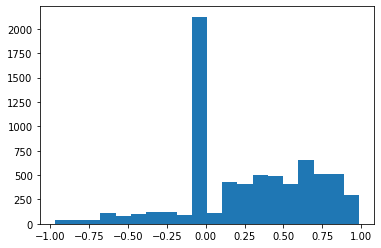

In [13]:
plt.hist(scores, bins=20)

My original hypothesis was that people who are talking about indoor farming were excited about it, with very few being against it. It is a niche. Not much reason to talk about it if you're not enthusiastic about it.

In [14]:
just_tweets['tweet'].str.contains('vertical farm', regex=False).value_counts()

False    6581
True      602
Name: tweet, dtype: int64

In [15]:
just_tweets['sentiment'] = scores

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


positive sentiment: compound score >= 0.05  

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)  

negative sentiment: compound score <= -0.05  
  
https://github.com/cjhutto/vaderSentiment#about-the-scoring

In [17]:
just_tweets['score'] = pd.cut(just_tweets.sentiment,bins=[-1,-0.051,0.049,1],labels=['negative','neutral','positive'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
just_tweets

,tweet,sentiment,score
date,,,
2020-05-14,“i only have ugly pennies”\n“show me your ant ...,-0.7345,negative
2020-05-14,No indoor plumbing yet? Sounds like my Momma’...,0.8999,positive
2020-05-14,"“But...”, someone shouts. “... indoor farms!” ...",0.5093,positive
2020-05-14,Learn how to grow weed >> http://www.howtogro...,0.5994,positive
2020-05-14,For me it's partly due to having more time to ...,0.0000,neutral
...,...,...,...
2019-05-25,**Lemon Kush** Indoor grown by Fern Ridge Farm...,0.7170,positive
2019-05-25,How this indoor hydroponic farm is improving f...,0.4215,positive
2019-05-25,My work friend invited me to her family's farm...,0.8289,positive


In [42]:
%run -i 'mod5_functions.py'

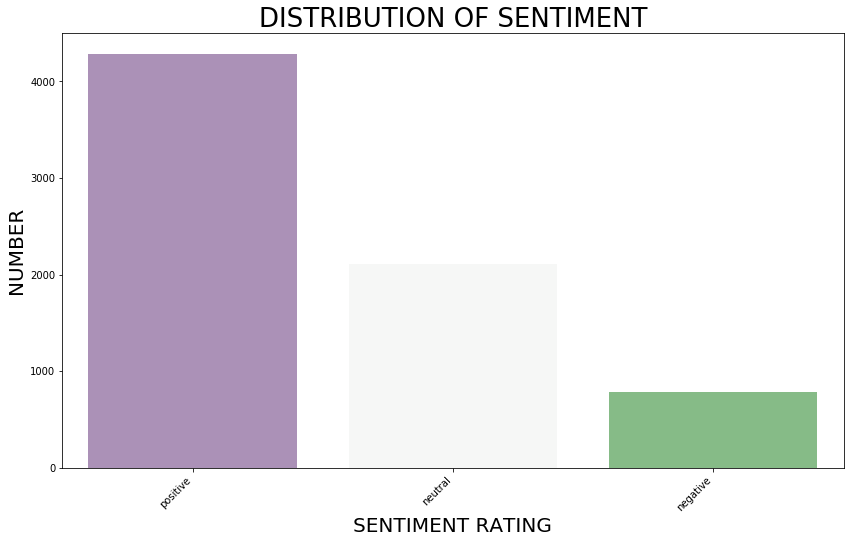

In [20]:
make_value_chart(just_tweets, 'score', 'SENTIMENT RATING', 'NUMBER', 'DISTRIBUTION OF SENTIMENT')

Can run statistical tests to confirm the amounts are statistically significantly different.

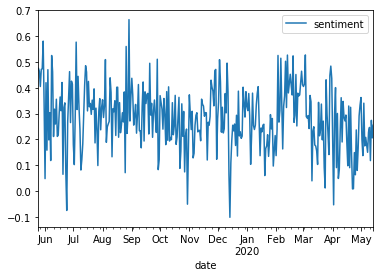

In [23]:
just_tweets.resample('D').mean().plot()

That was a good run. That particular dataset isn't long enough, doesn't go far back enough.

In [24]:
mas_twits = pd.read_csv('old_tweets.csv')

In [25]:
mas = vader_process(mas_twits)

mod5_functions.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = scores
mod5_functions.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels=['negative','neutral','positive'])


In [26]:
mas

,tweet,sentiment,score
date,,,
2020-05-13,There are over 50 urban farms in the metro Atl...,0.7840,positive
2020-05-13,"Urban farms, now we're talkin'! https://twitt...",0.0000,neutral
2020-05-13,Urban agriculture of some sort...I think we’re...,0.0000,neutral
2020-05-13,Reporting in #COVID19 times has meant intervie...,0.0258,neutral
2020-05-13,Food wins out over cars in #Singapore - Nine m...,0.5719,positive
...,...,...,...
2010-09-15,Board of Parks Votes YES on Rainier Beach Urba...,0.5319,positive
2010-09-14,Urban Farm Transforms Itself Into Urban Theate...,0.0000,neutral
2010-09-14,Urban Farm Transforms Itself Into Urban Theate...,0.0000,neutral


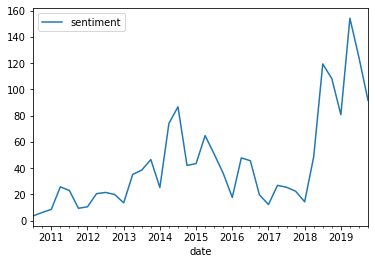

In [35]:
mas['2019-12-31':].resample('Q').sum().plot()

How much cleaning do I need to do for VADER analysis? Seems to work fine, and not much documentation on how to clean. Since VADER was made specifically to analyze social media blurbs with built in processing for certain punctuation and emojis, it seems that cleaning is not necessary. Maybe removing usernames and other irrelevant info would be good, though..